In [141]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
from src.pocet_stran import pocet_stran
import pandas as pd
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)

In [142]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [143]:
sestset = pd.read_parquet(os.path.join("data/cnb_sloupce","600.parquet"))

In [144]:
sestset

,600_ind1,600_ind2,600_a,600_d,600_7,600_2,600_c,600_b,600_t,600_q,600_x,600_n,600_r,600_l,600_p,600_k,600_m,600_o,600_z,600_y
001,,,,,,,,,,,,,,,,,,,,
ck8300101,[1],[7],"[Lunačarskij, Anatolij Vasil'jevič,]",[1875-1933],[jn19981001778],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
srk19960000328,[1],[7],"[Kotrba, Heřman,]",[1913-1989],[jz8600488],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
ck8300314,[1],[7],"[Sudek, Josef,]",[1896-1976],[jk01121661],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
ck8300361,"[0, 0]","[7, 7]","[Désirée,, Napoleon]","[1777-1860, 1769-1821]","[jn20031021014, jn20000604140]","[czenas, czenas]","[královna, choť Karla XIV. Jana, švédského a n...","[None, I.,]",None,None,None,None,None,None,None,None,None,None,None,None
ck8300374,[1],[7],"[García Lorca, Federico,]",[1898-1936],[jn19981001316],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243632367,[1],[7],"[Haňková, Eva,]",[1925-],[xx0055450],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
cpk20243632419,[1],[7],"[Hus, Jan,]",[asi 1371-1415],[jk01043287],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
cpg20243632428,[1],[7],"[Křižík, František,]",[1847-1941],[jk01070202],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [185]:
sestset[sestset['600_a'].astype(str).str.contains('Marie')]

,600_ind1,600_ind2,600_a,600_d,600_7,600_2,600_c,600_b,600_t,600_q,600_x,600_n,600_r,600_l,600_p,600_k,600_m,600_o,600_z,600_y,kdo
001,,,,,,,,,,,,,,,,,,,,,
ck8301407,[1],[7],"[Zieglerová, Marie,]",[1881-1966],[jk01152589],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Zieglerová, Marie (1881-1966)"
ck8301933,[1],[7],"[Pujmanová, Marie,]",[1893-1958],[jk01101703],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Pujmanová, Marie (1893-1958)"
ck8601177,"[1, 1]","[7, 7]","[Kalkusová, Marie,, Kalkus, František,]","[1893-1979, 1894-1968]","[jn20000728277, jn20000728276]","[czenas, czenas]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Kalkusová, Marie (1893-1979)"
ck8601996,[0],[7],"[Marie Terezie,]",[1717-1780],[jn20000701157],[czenas],"[česká a uherská královna, císařovna, choť Fra...",None,None,None,None,None,None,None,None,None,None,None,None,None,Marie Terezie (1717-1780)
ck8604211,[1],[7],"[Těšitelová, Marie,]",[1921-2011],[jk01132304],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Těšitelová, Marie (1921-2011)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243613982,[1],[7],"[Ladrová, Marie,]",[1981-],[mzk20221160340],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Ladrová, Marie (1981-)"
cpk20243613995,"[0, 0, 0, 0]","[7, 7, 9, 9]","[Marie,, Louis-Marie Grignion de Montfort,, Ma...","[None, 1673-1716, None, 1673-1716]","[ola2002100464, jn19990002892, None, None]","[czenas, czenas, eczenas, eczenas]","[Panna, svatý,, Blessed Virgin, Saint, Saint,]",None,None,None,None,None,None,None,None,None,None,None,None,None,Marie (None)
nkc20243614256,"[1, 1]","[7, 7]","[Křivánková, Marie,, Filipová, Zdeňka,]","[1910-1991, 1933-]","[jo20241232268, jo20241232267]","[czenas, czenas]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Křivánková, Marie (1910-1991)"


In [167]:
def hezke_jmeno(radek):
    cislo, roky = "", ""
    jmeno = radek['600_a'][0]
    if jmeno[-1] == ',':
        jmeno = jmeno[:-1]
    try:
        if len(radek['600_b']) > 0:
            cislo = radek['600_b'][0].replace(',','')
    except:
        pass
    try:
        if len(radek['600_d']) > 0:
            roky = f"({radek['600_d'][0]})"
    except:
        pass
    return f"{jmeno} {cislo}{roky}".strip()

In [175]:
sestset['kdo'] = sestset.apply(lambda row: hezke_jmeno(row), axis=1)
sestset['kdo'].sample(200)

001
nkc20081829269                Zeisberger, David (1721-1808)
bkn20011006970                    Bezruč, Petr (1867-1958.)
nkc20112223496                    Evans, Richard J. (1947-)
cpk20041448537                     Hus, Jan (asi 1371-1415)
cpg20183058236                   Ostermeier, Thomas (1968-)
nkc20172885947                       Honsa, Jan (1876-1937)
cpk20041493039                   Jessenius, Jan (1566-1621)
cpk20051497101                 Nedvěd, Vladimír (1917-2012)
nkc20172867014                                Ježíš Kristus
cpk19980296395                    Baarová, Lída (1914-2000)
cpk20010991618      Goethe, Johann Wolfgang von (1749-1832)
cpk20000967174         Putin, Vladimir Vladimirovič (1952-)
cpk19970213520      Onassis, Jacqueline Kennedy (1929-1994)
nkc20162778769        Aristotelés (384 př. Kr.-322 př. Kr.)
nkc20061660698                  Poledník, Karel (1886-1960)
np9305763                         Cmíral, Adolf (1882-1963)
cpk19970216580                Helfer

In [149]:
df = df.merge(sestset, left_index=True, right_index=True, how="left")

In [163]:
df_expl = df.explode('kdo')

In [215]:
df_expl[df_expl['rok'] > 2000].groupby('kdo').size().nlargest(100)

kdo
Ježíš Kristus                                    372
Masaryk, Tomáš Garrigue (1850-1937)              190
Marie                                            149
Karel IV.,(1316-1378)                            136
Hitler, Adolf (1889-1945)                        135
Komenský, Jan Amos (1592-1670)                    93
Baťa, Tomáš (1876-1932)                           84
Havel, Václav (1936-2011)                         81
Hus, Jan (asi 1371-1415)                          80
Habsburkové (rod)                                 75
Beneš, Edvard (1884-1948)                         70
Hrabal, Bohumil (1914-1997)                       67
Kafka, Franz (1883-1924)                          67
Ježíš Kristus (None)                              62
Leonardo (1452-1519)                              61
Verne, Jules (1828-1905)                          59
Shakespeare, William (1564-1616)                  57
Janáček, Leoš (1854-1928)                         54
Heydrich, Reinhard (1904-1942)            

In [211]:
df_expl.groupby('kdo').size().nlargest(100)

kdo
Ježíš Kristus                               696
Masaryk, Tomáš Garrigue (1850-1937)         600
Marie                                       321
Komenský, Jan Amos (1592-1670)              304
Hus, Jan (asi 1371-1415)                    257
Karel IV.,(1316-1378)                       188
Hitler, Adolf (1889-1945)                   174
Beneš, Edvard (1884-1948)                   161
Čapek, Karel (1890-1938)                    145
Lenin, Vladimir Il‘jič (1870-1924)          142
Havel, Václav (1936-2011)                   125
Němcová, Božena (1820-1862)                 117
Hrabal, Bohumil (1914-1997)                 113
Mácha, Karel Hynek (1810-1836)              113
Habsburkové (rod)                           112
Baťa, Tomáš (1876-1932)                     108
Janáček, Leoš (1854-1928)                   108
Smetana, Bedřich (1824-1884)                108
Václav (asi 907-asi 935)                    108
Kafka, Franz (1883-1924)                    107
Stalin, Iosif Vissarionovič (1879-19

<Axes: xlabel='rok'>

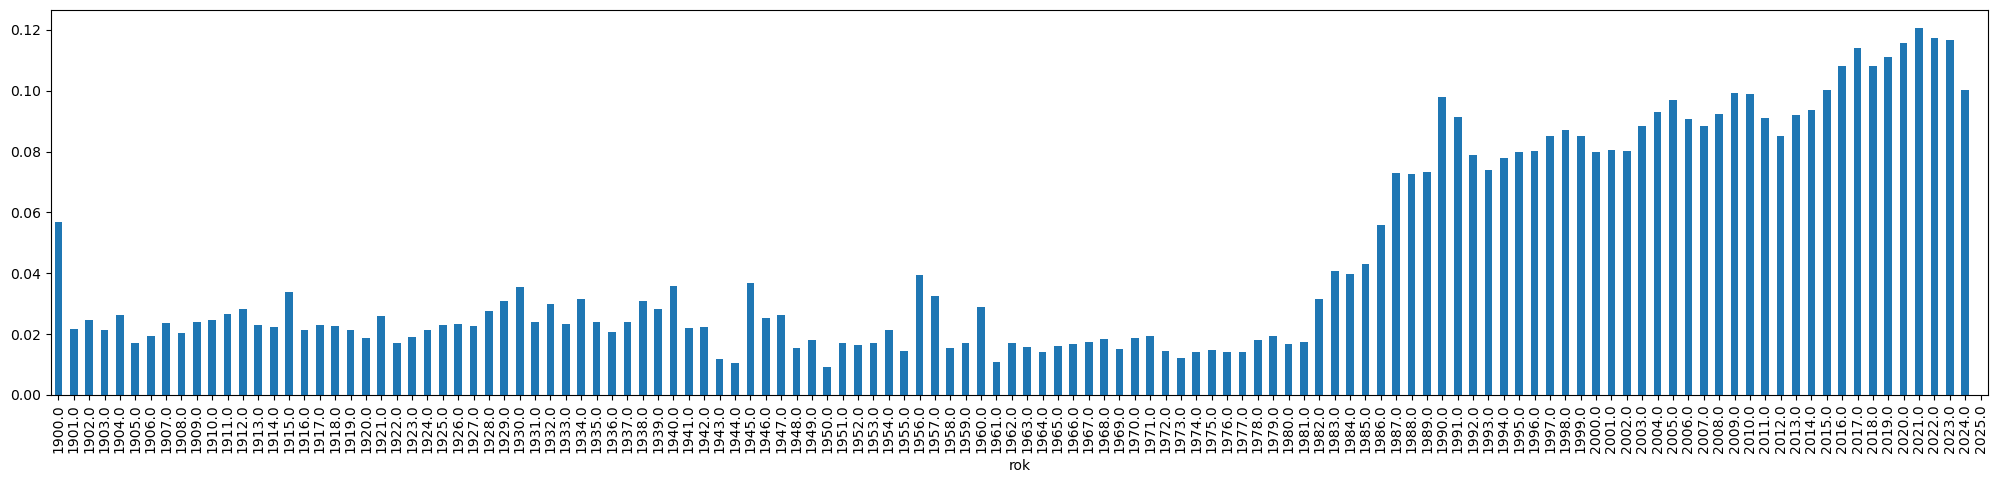

In [181]:
(df[df['600_a'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

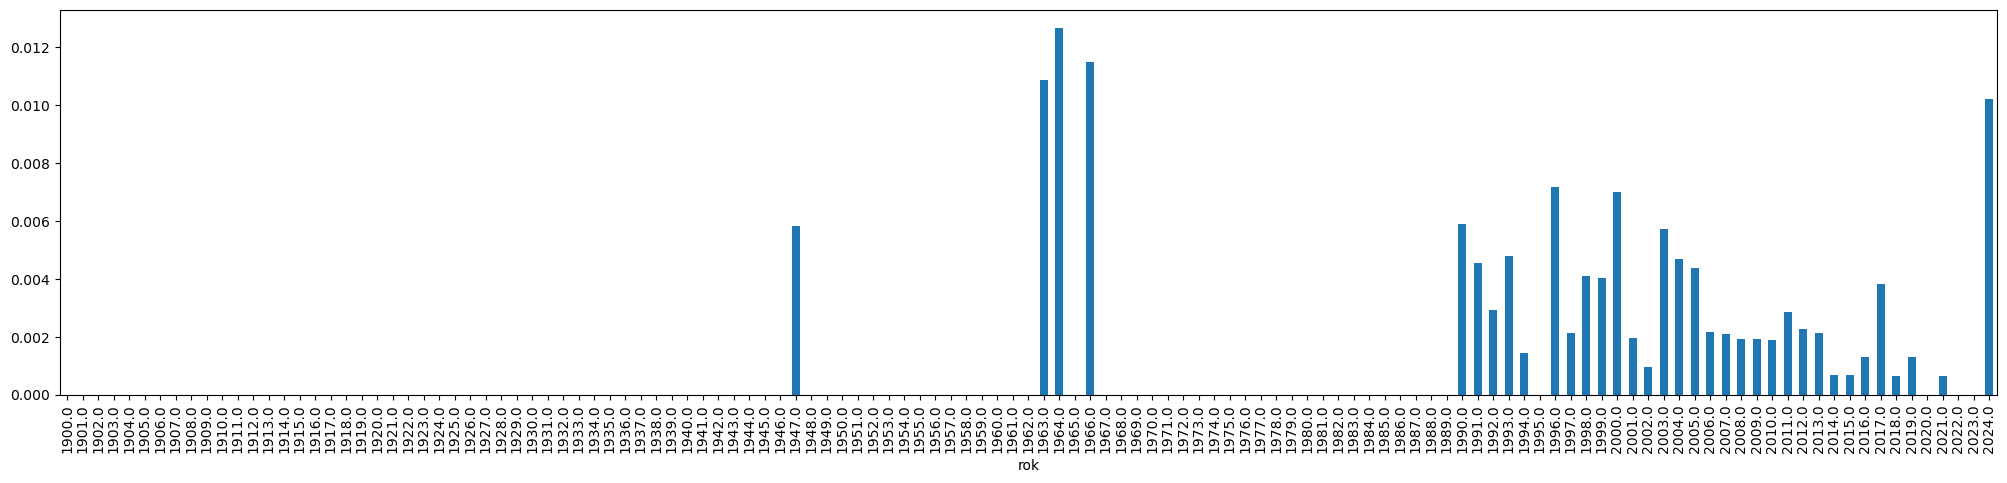

In [217]:
graf('Kafka, Franz (1883-1924)')

In [183]:
df[df['kdo'] == 'Marie']

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,600_ind1,600_ind2,600_a,600_d,600_7,600_2,600_c,600_b,600_t,600_q,600_x,600_n,600_r,600_l,600_p,600_k,600_m,600_o,600_z,600_y,kdo
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk192803339,990718s1928 xr g 000 1 cze,None,None,[(Brožováno)],[cze],[ita],1,None,[27-5],[Liturgie. Křesťanské umění a symbolika. Ducho...,"[27-312.47-5, 272-184.3, 27-4, 272-549, 27-534...",[aut],jk01111475,"Skalík, František,",1867-1904,None,Eucharistický Zdrávas /,od autora Eucharistických jisker ; z italštiny...,None,None,None,None,None,None,None,None,None,None,None,"[V Olomouci-Řepčíně :, Lidové závody tiskařské...","[[nakladatel není známý],, None]","[1928, None]","[1, 3]",[38 stran ;],None,[14 cm],None,None,None,None,None,None,None,None,"[katolická víra, křesťanský život, eucharistie...",None,None,None,None,None,[úvahy],None,None,None,None,[trl],[osa2012697594],[Dominikánky kongregace],None,None,None,None,nam a22 i 4500,1928.0,[0],[7],"[Marie,]",None,[ola2002100464],[czenas],[Panna],None,None,None,None,None,None,None,None,None,None,None,None,None,Marie
bk193001189,000505s1930 xr e f 000 mdcze,None,None,[(Brožováno)],None,None,None,None,[27-5],[Liturgie. Křesťanské umění a symbolika. Ducho...,"[27-563.5, 272-534.35, 27-312.47, 27-312.47-5,...",None,None,None,None,None,Církevní hodinky k uctění blahoslavené Panny M...,None,None,None,None,None,None,None,None,None,None,None,None,[V Olomouci :],"[nákladem ""Serafínských květů"",]",[[1930?]],[1],[111 stran ;],None,[17 cm],None,None,None,None,None,None,None,None,"[liturgie hodin, katolické modlitby, mariánský...",None,None,None,None,None,[příručky],None,None,None,None,None,None,None,None,None,[Serafínské květy],None,nam a22 i 4500,1930.0,[0],[7],"[Marie,]",None,[ola2002100464],[czenas],[Panna],None,None,None,None,None,None,None,None,None,None,None,None,None,Marie
bk193203977,000211s1932 xr af g 000 0dcze,None,None,[(Brož.)],None,None,None,None,[27-5],[Liturgie. Křesťanské umění a symbolika. Ducho...,"[27-312.47-587.5, 726.5:27-567-312.47, (44), (...",[aut],jk01121563,"Stříž, Antonín Ludvík,",1888-1960,None,La Saletta :,Antonín Stříž,None,None,None,None,None,[V Praze :],"[Ladislav Kuncíř,]",[1932],None,None,None,None,None,None,None,"[185 s., [1] l. obr. příl. :]",[il. ;],[18 cm],[Vinice Páně],None,None,None,None,None,[Český text],"[1846, 19. století]","[mariánská zjevení, mariánská poutní místa]",None,"[19. století, None]","[Francie, Francie]",[La Salette (Francie)],None,[pojednání],None,None,None,None,None,None,None,None,[Vinice Páně (Ladislav Kuncíř)],None,None,nam a22 a 4500,1932.0,[0],[7],"[Marie,]",None,[ola2002100464],[czenas],[Panna],None,None,None,None,None,None,None,None,None,None,None,None,None,Marie
bk193206057,000505s1928 xr e 000 1 cze,None,None,[(Brožováno)],None,None,None,None,[27],[Křesťanství. Křesťanská církev všeobecně. Ekl...,"[27-184.3, 27-312.47-5, 27-584, 27-4, 27-583, ...",[aut],jk01141496,"Vaněk, František Bernard,",1872-1943,None,Zdrávas Maria :,Fr. B. Vaněk,None,None,None,[II. vydání],None,None,None,None,None,None,None,"[V Pelhřimově :, None]","[[nakladatel není známý],, Tiskem E. Šprongla]","[1928, None]","[1, 3]",[101 stran ;],None,[24 cm],"[Příloha ""Kazatelny"" ;]",[svazek XXXIX.],None,None,None,None,None,None,"[křesťanská víra, mariánský kult, duchovní živ...",None,None,None,None,None,[úvahy],None,None,None,None,None,None,None,None,[Příloha Kazatelny],None,None,nam a22 i 4500,1928.0,[0],[7],"[Marie,]",None,[ola2002100464],[czenas],[Panna],None,None,None,None,None,None,None,None,None,None,None,None,None,Marie
bk193402436,990812s1934 xr e f 000 1dcze

In [201]:
def graf(jmeno):
    return (df[df['kdo'] == jmeno].groupby('rok').size() / df[df['600_a'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

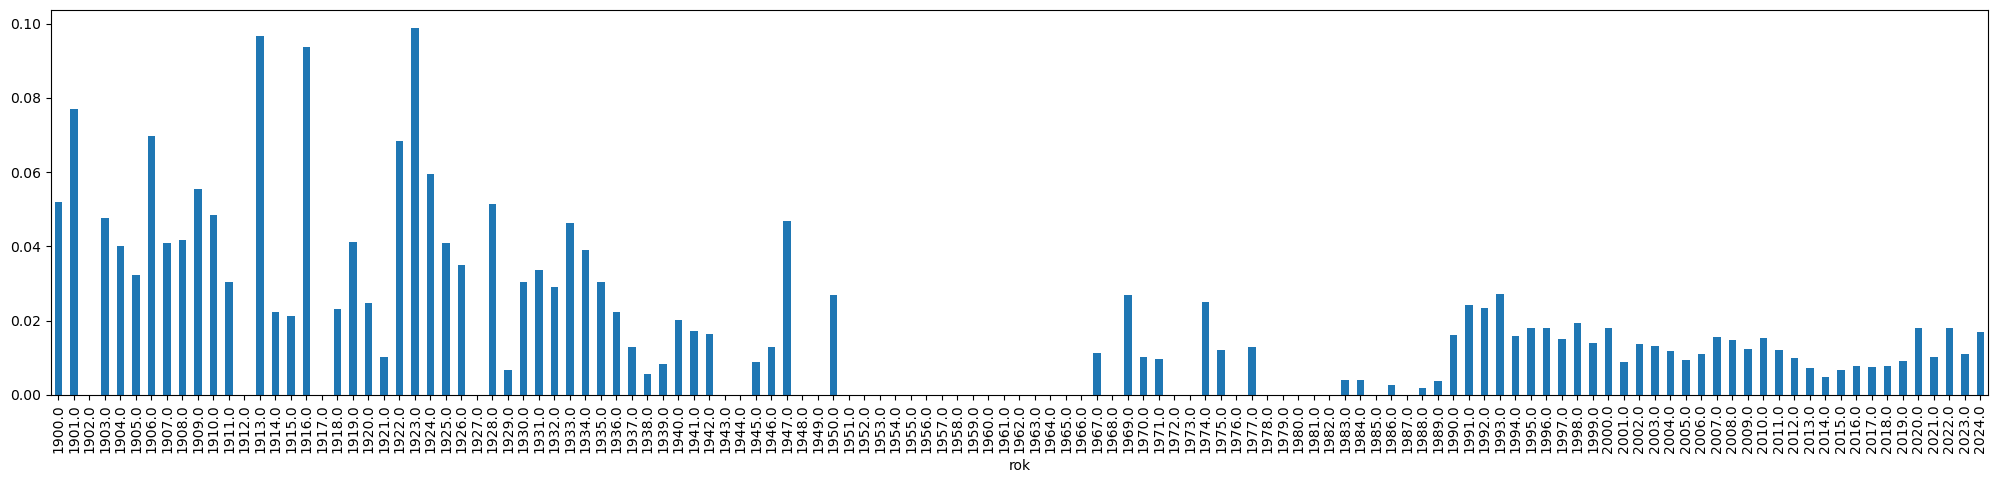

In [203]:
graf('Ježíš Kristus')

<Axes: xlabel='rok'>

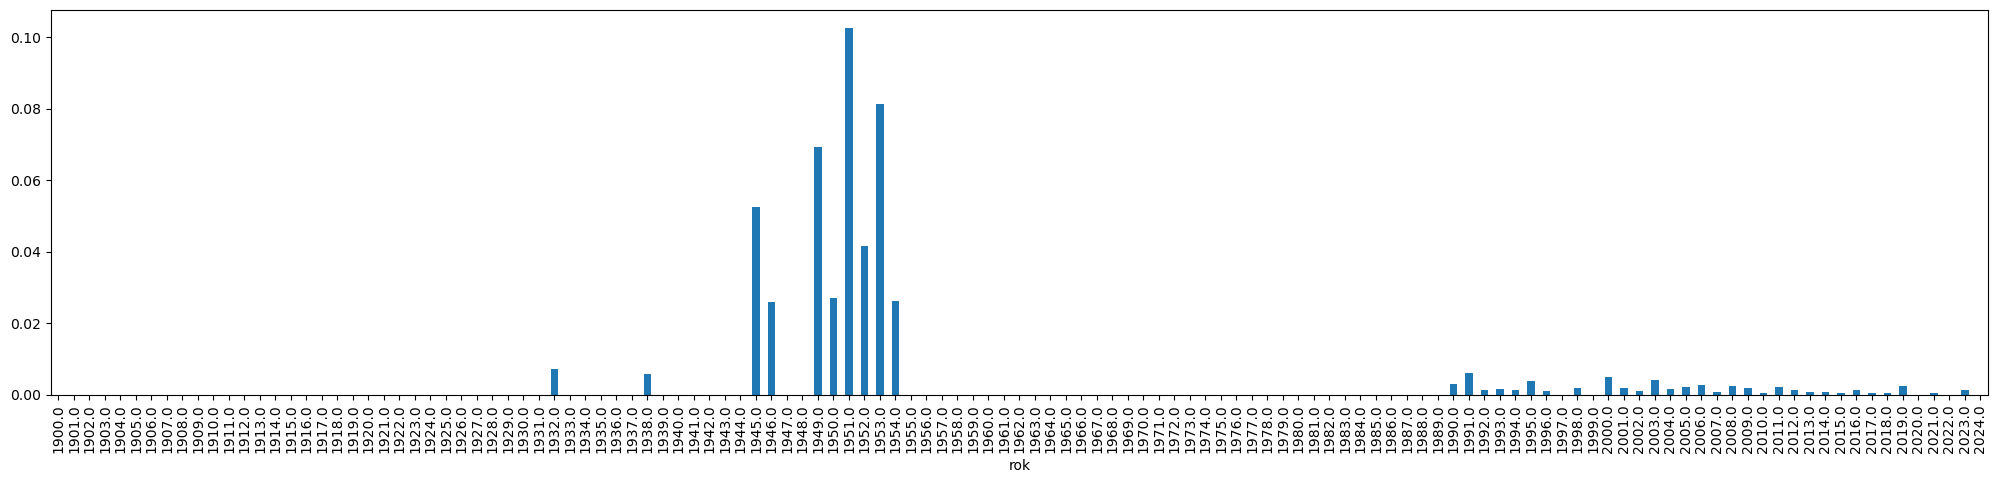

In [205]:
graf('Stalin, Iosif Vissarionovič (1879-1953)')

<Axes: xlabel='rok'>

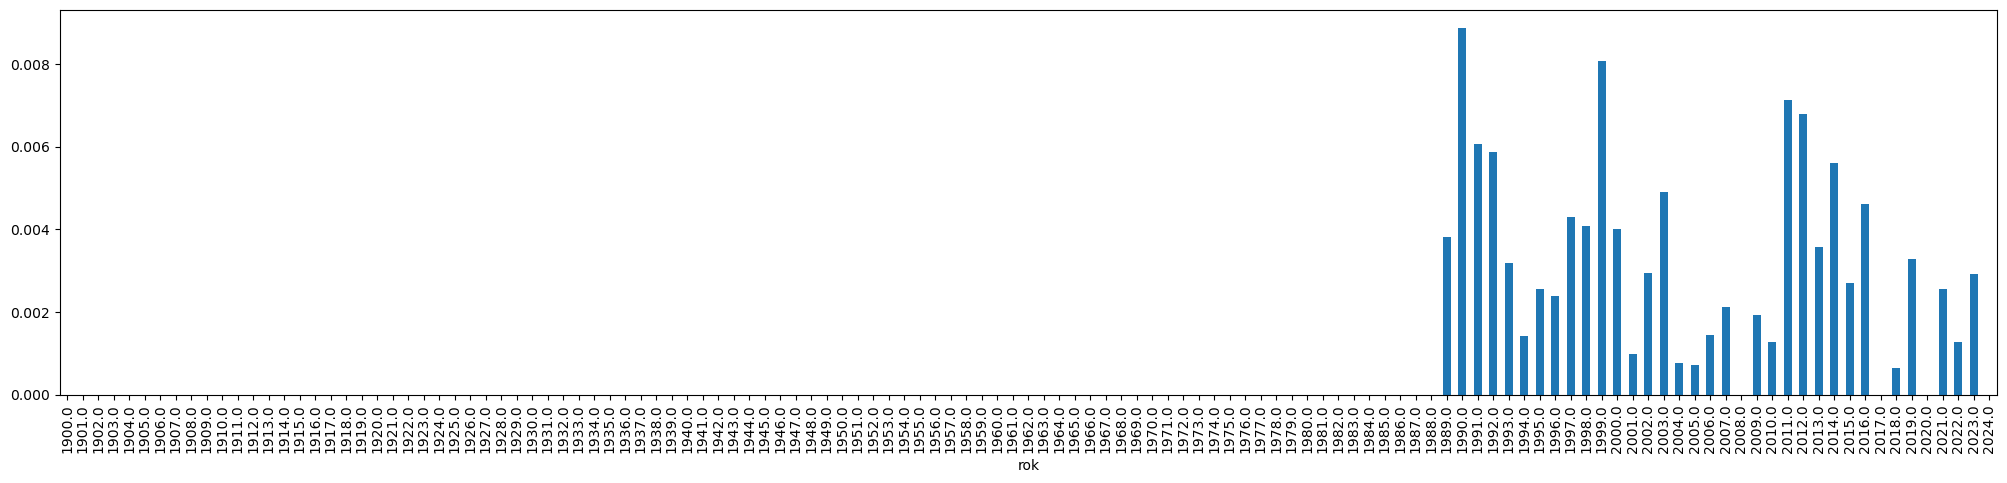

In [207]:
graf('Havel, Václav (1936-2011)')

<Axes: xlabel='rok'>

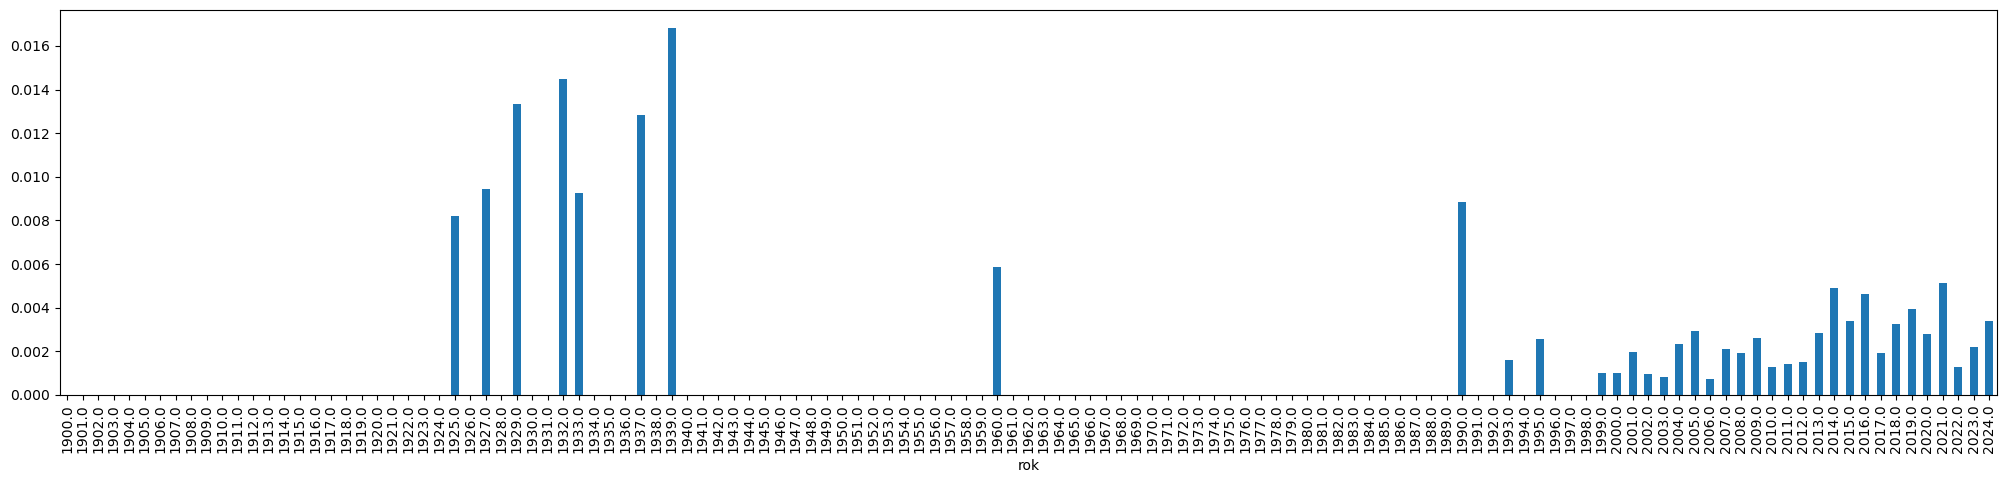

In [209]:
graf('Baťa, Tomáš (1876-1932)')

<Axes: xlabel='rok'>

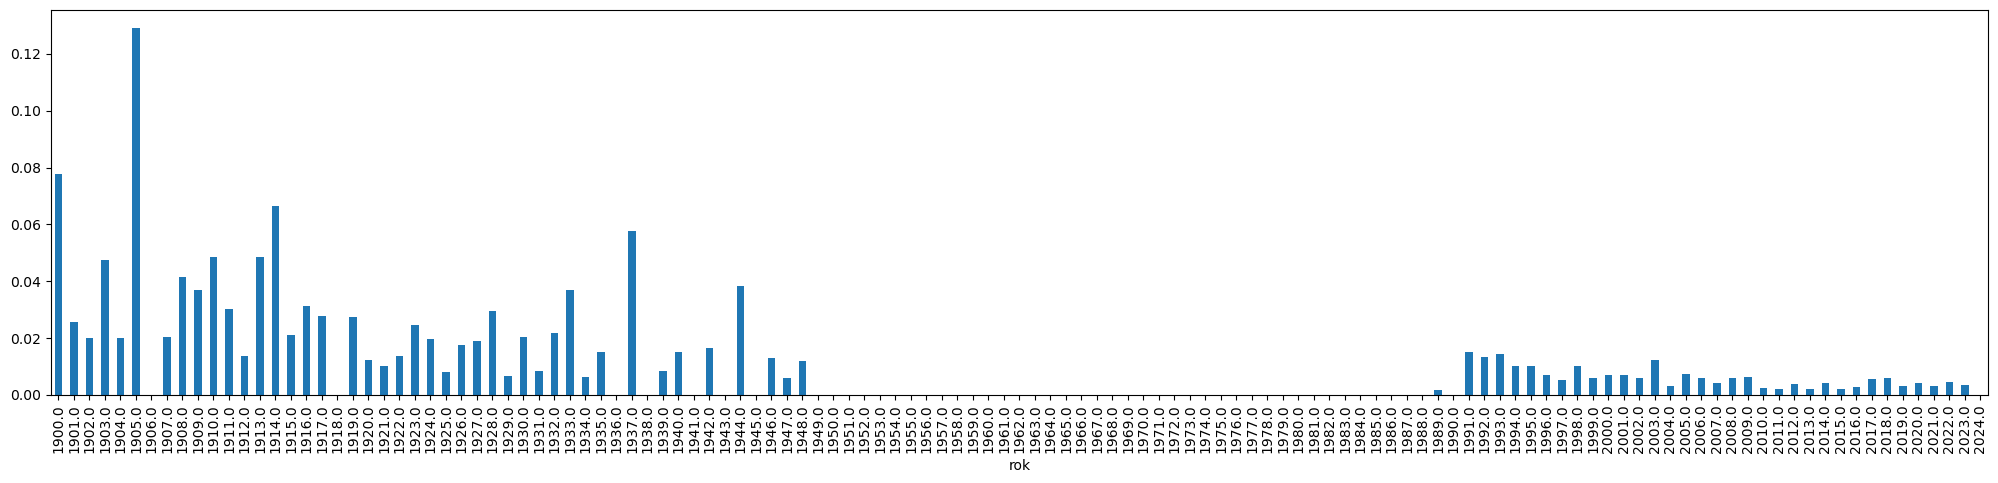

In [213]:
graf('Marie')

<Axes: xlabel='rok'>

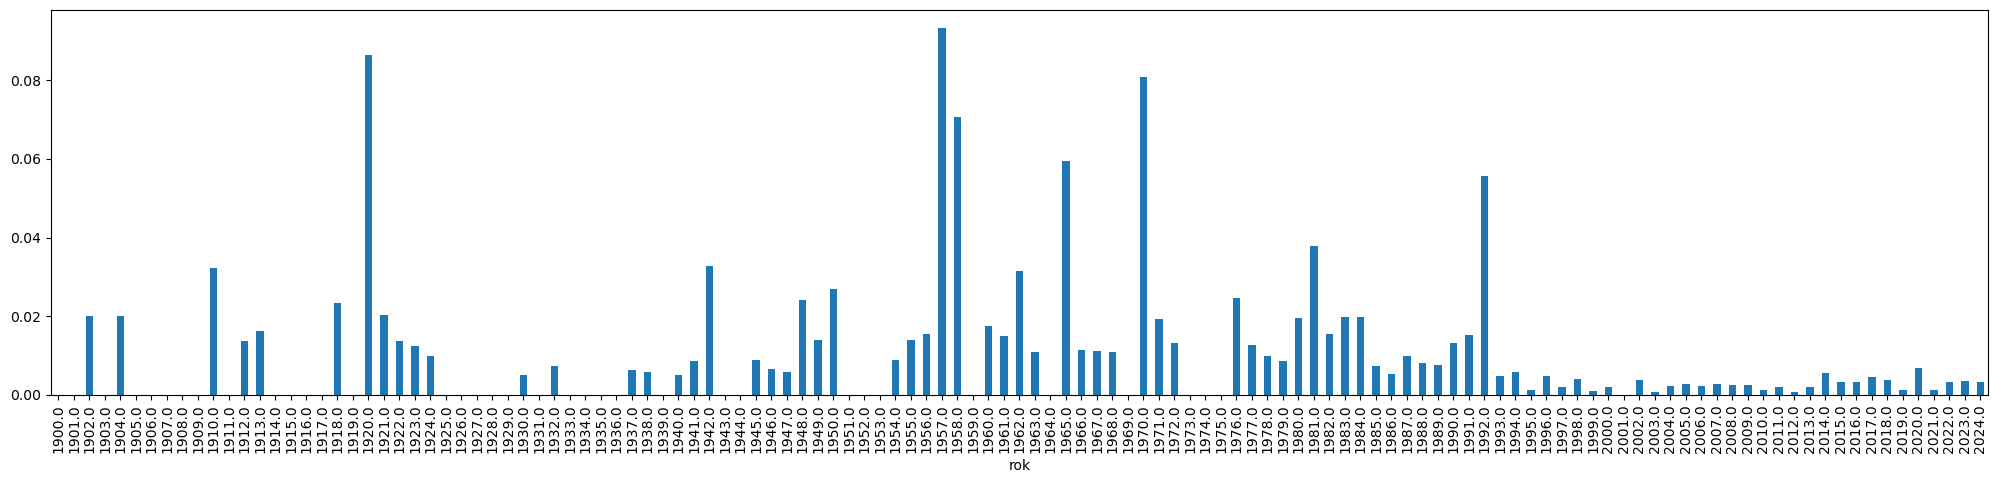

In [193]:
(df[df['kdo'] == 'Komenský, Jan Amos (1592-1670)'].groupby('rok').size() / df[df['600_a'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

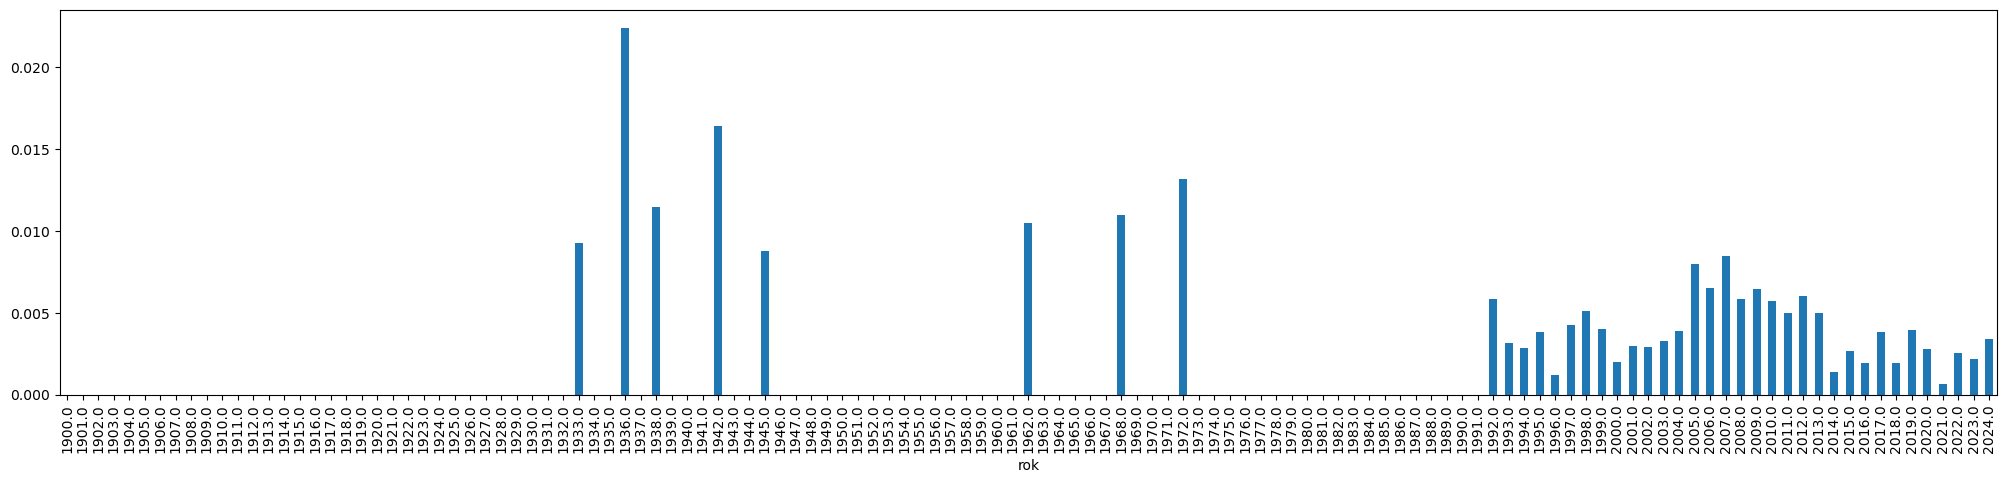

In [195]:
(df[df['kdo'] == 'Hitler, Adolf (1889-1945)'].groupby('rok').size() / df[df['600_a'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

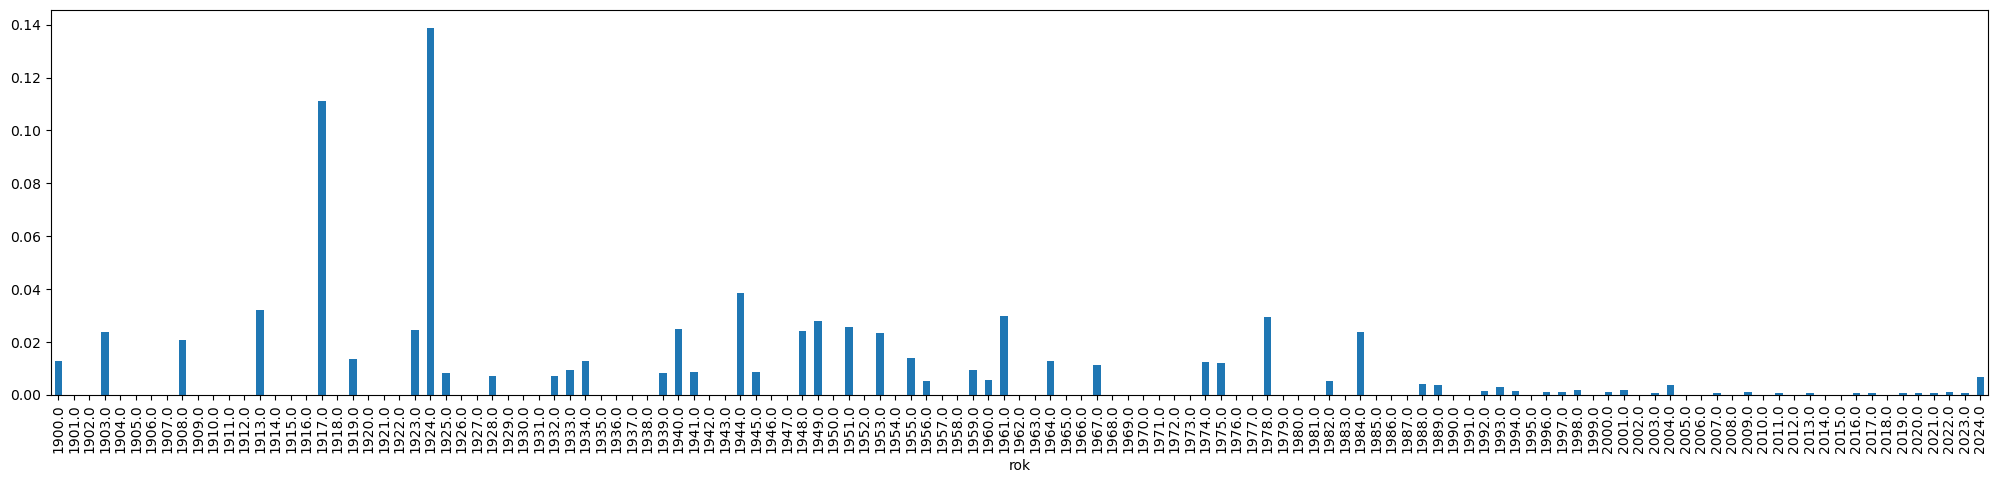

In [197]:
(df[df['kdo'] == 'Smetana, Bedřich (1824-1884)'].groupby('rok').size() / df[df['600_a'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))